# Utilização de algoritmos de inteligência artificial na previsão de resultados de partidas de futebol

Estudo e comparação do desempenho de diferentes algoritmos de inteligência artificial

TCC do curso de Ciência da Computação do Instituto Federal do Triângulo Mineiro - Campus Ituiutaba

Autor: Olesio Gardenghi Neto

## Pré-processamento dos dados

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
plt.style.use('seaborn')
%matplotlib inline

In [287]:
df = pd.read_csv("data/PremierLeague.csv")

In [288]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [289]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

#### Descrição das colunas
Key to results data:

Div = League Division  
Date = Match Date (dd/mm/yy)  
Time = Time of match kick off  
HomeTeam = Home Team  
AwayTeam = Away Team  
FTHG and HG = Full Time Home Team Goals  
FTAG and AG = Full Time Away Team Goals  
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)  
HTHG = Half Time Home Team Goals  
HTAG = Half Time Away Team Goals  
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)  

Match Statistics (where available)  
Attendance = Crowd Attendance  
Referee = Match Referee  
HS = Home Team Shots  
AS = Away Team Shots  
HST = Home Team Shots on Target  
AST = Away Team Shots on Target  
HHW = Home Team Hit Woodwork  
AHW = Away Team Hit Woodwork  
HC = Home Team Corners  
AC = Away Team Corners  
HF = Home Team Fouls Committed  
AF = Away Team Fouls Committed  
HFKC = Home Team Free Kicks Conceded  
AFKC = Away Team Free Kicks Conceded  
HO = Home Team Offsides  
AO = Away Team Offsides  
HY = Home Team Yellow Cards  
AY = Away Team Yellow Cards  
HR = Home Team Red Cards  
AR = Away Team Red Cards  
HBP = Home Team Bookings Points (10 = yellow, 25 = red)  
ABP = Away Team Bookings Points (10 = yellow, 25 = red)  

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 62 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA       

In [291]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


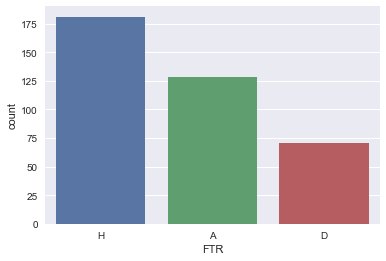

In [292]:
sns.countplot(x='FTR', data=df)

In [293]:
# Selecionando apenas as características que nos interessa
df = df[['FTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTHG','HTAG','HTR']]

In [294]:
df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,H,8,13,6,4,11,8,2,5,2,1,0,0,1,0,H
1,H,12,10,4,1,11,9,7,4,1,1,0,0,1,0,H
2,A,15,10,6,9,9,11,5,5,1,2,0,0,0,1,A
3,A,6,13,1,4,9,8,2,5,2,1,0,0,0,2,A
4,A,15,15,2,5,11,12,3,5,2,2,0,0,1,2,A


In [295]:
# Transformando os dados categóricos de FTR para numéricos
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['FTR'])
df['FTR'] = label_encoder.transform(df['FTR'])

# Transformando os dados categóricos de HTR para numéricos
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['HTR'])
df['HTR'] = label_encoder.transform(df['HTR'])

df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,HTR
0,2,8,13,6,4,11,8,2,5,2,1,0,0,1,0,2
1,2,12,10,4,1,11,9,7,4,1,1,0,0,1,0,2
2,0,15,10,6,9,9,11,5,5,1,2,0,0,0,1,0
3,0,6,13,1,4,9,8,2,5,2,1,0,0,0,2,0
4,0,15,15,2,5,11,12,3,5,2,2,0,0,1,2,0


In [296]:
# Normalizando os dados com o StandardScaler
# A distribuição dos dados será transformada tal que sua média = 0 e o desvio padrão = 1
# z = (x-u)/σ
# x = dados, u = média, σ = desvio padrão
scaler = StandardScaler()
scaler.fit(df.drop(['FTR'],axis=1))
dados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[1:])
df = df[['FTR']]
df = pd.concat([df, df_normalizado], axis=1, sort=False)
df.head()

"\nscaler = StandardScaler()\nscaler.fit(df.drop(['FTR'],axis=1))\ndados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))\ndf_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[1:])\ndf = df[['FTR']]\ndf = pd.concat([df, df_normalizado], axis=1, sort=False)\ndf.head()\n"

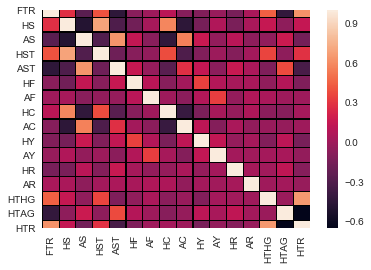

In [297]:
#Mapa de calor de correlações
sns.heatmap(df.corr(),linewidths=0.1,linecolor="black")

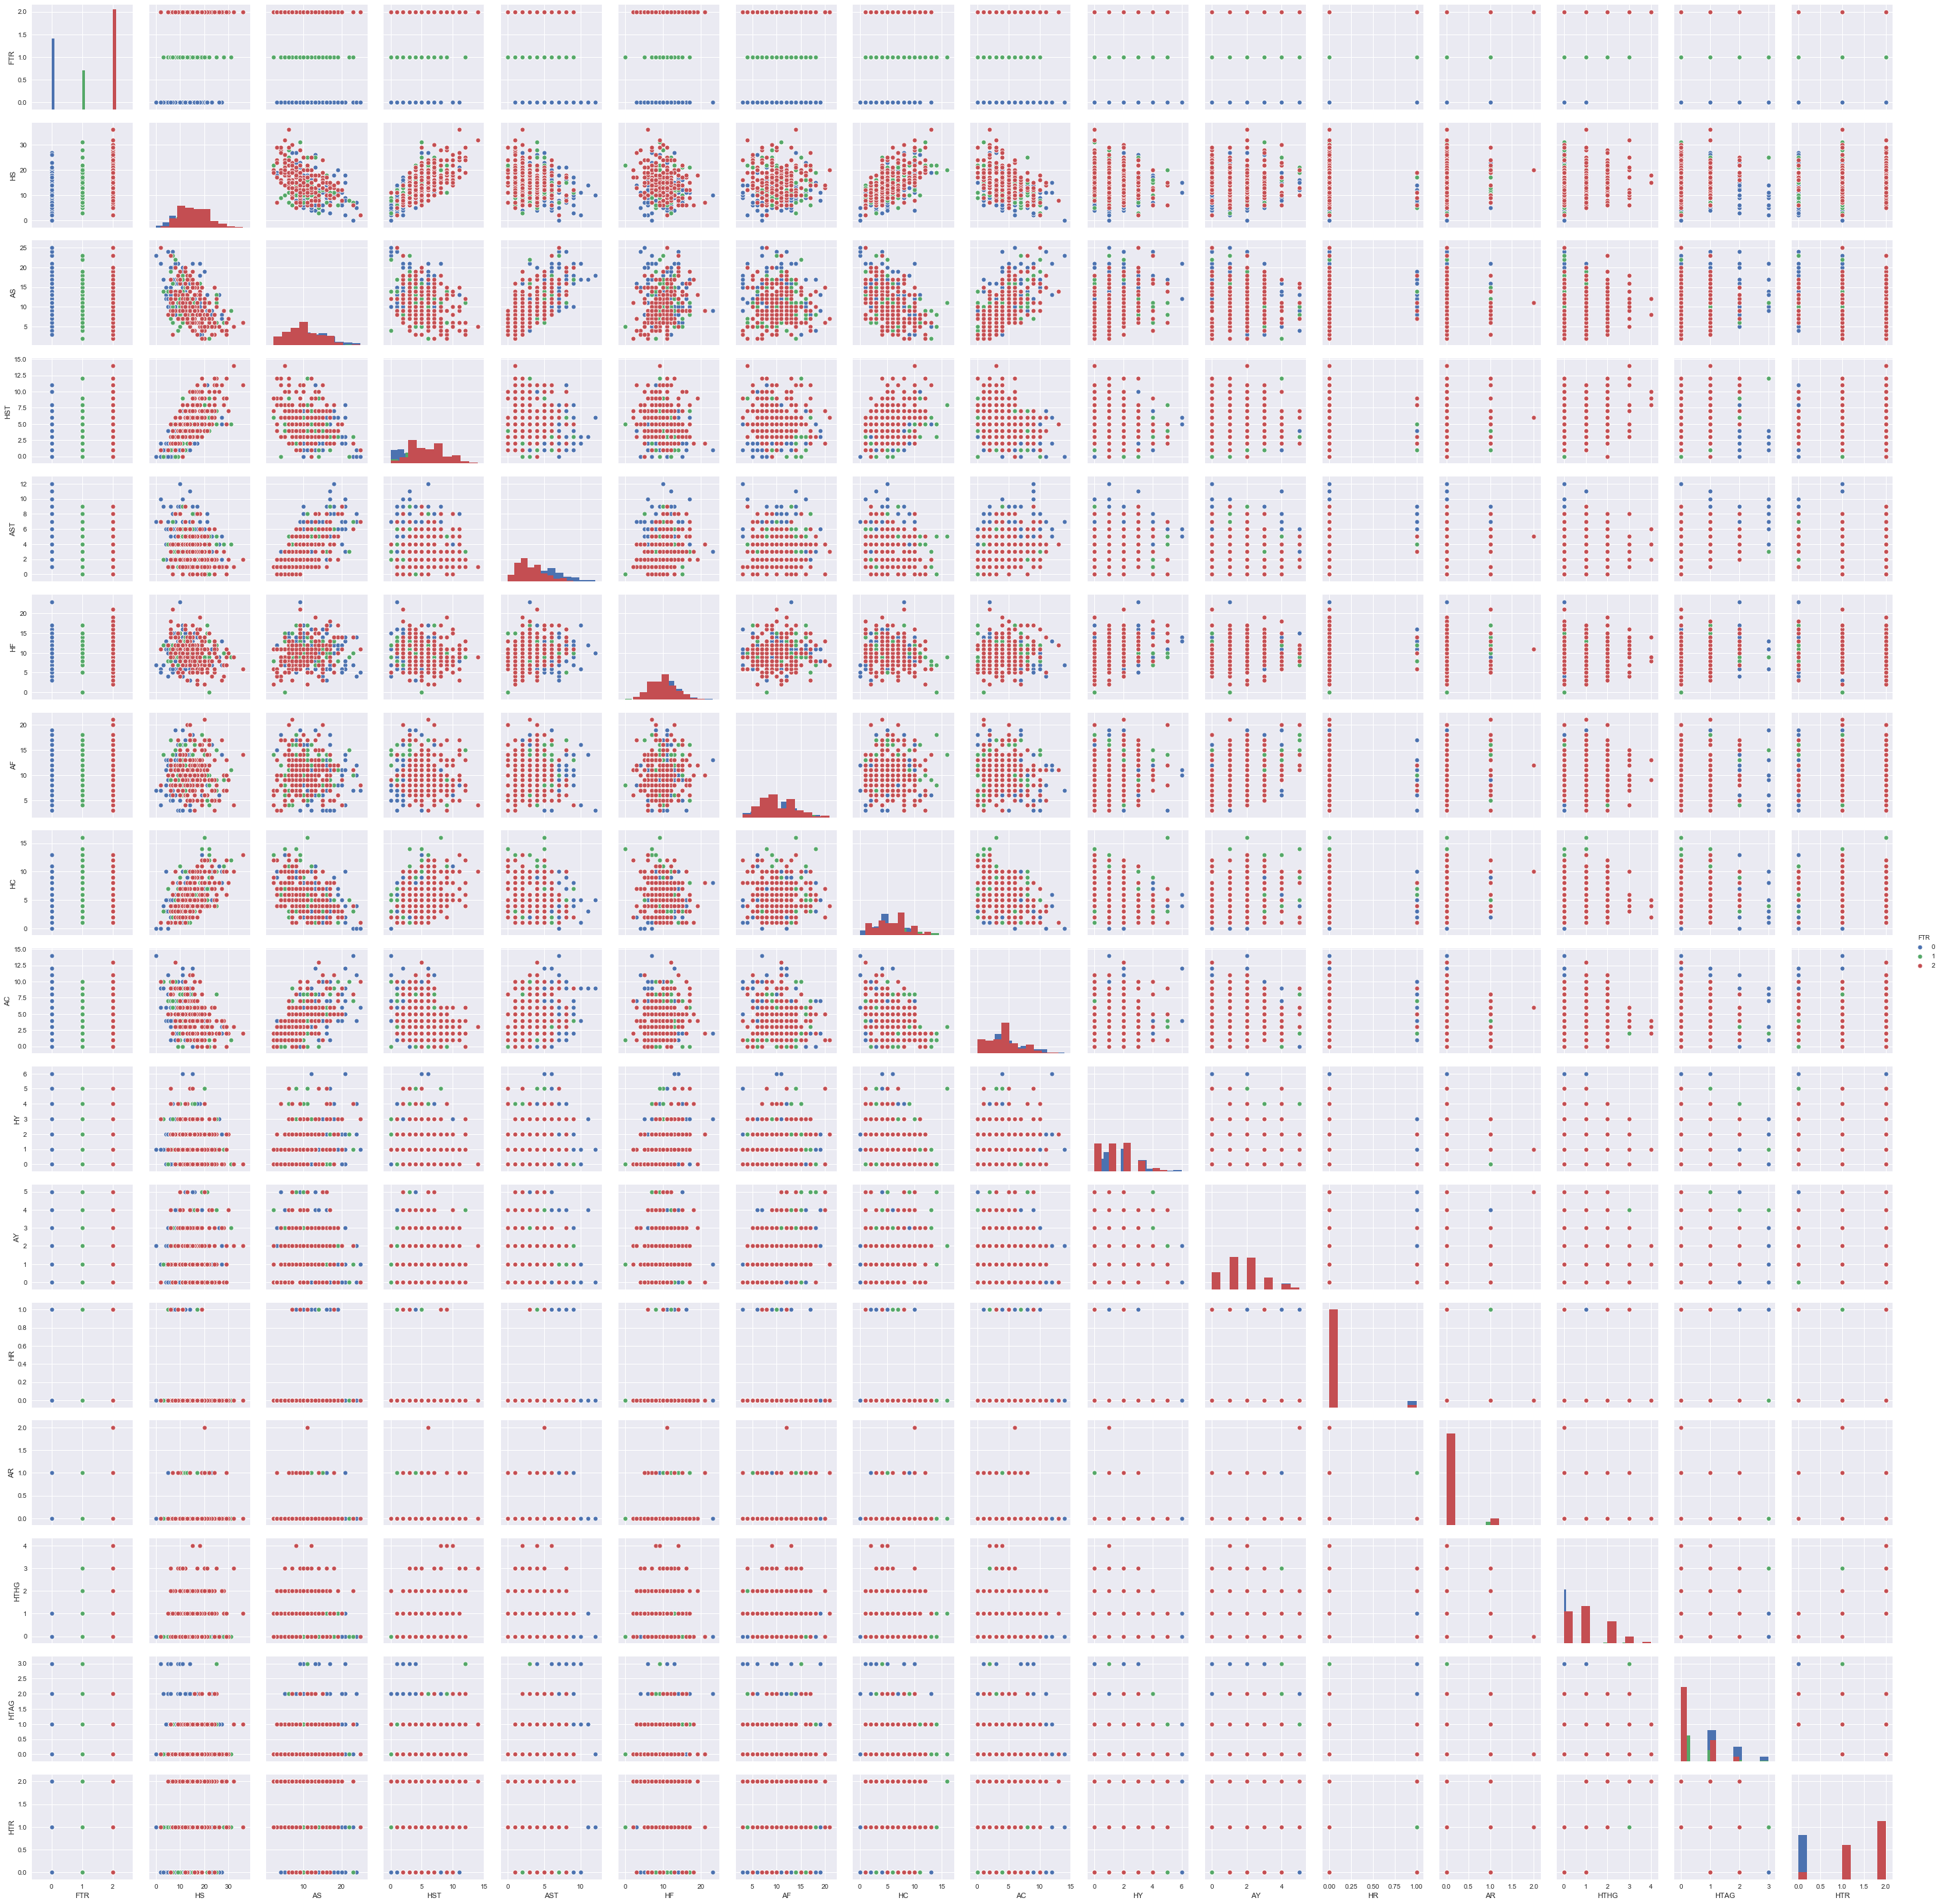

In [298]:
#Distribuição dos dados em pares
sns.pairplot(data=df,hue="FTR", diag_kind='hist')

## Aplicando os algoritmos de IA

In [299]:
# Características
X = df.drop('FTR',axis=1)
# Alvo da previsão
y = df['FTR']

In [300]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [301]:
df_y_test = y_test.reset_index()
df_y_test.drop('index',axis=1, inplace=True)

### Regressão Linear

In [302]:
from sklearn.linear_model import LinearRegression

In [303]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predict_linear_regression = linear_regression.predict(X_test)

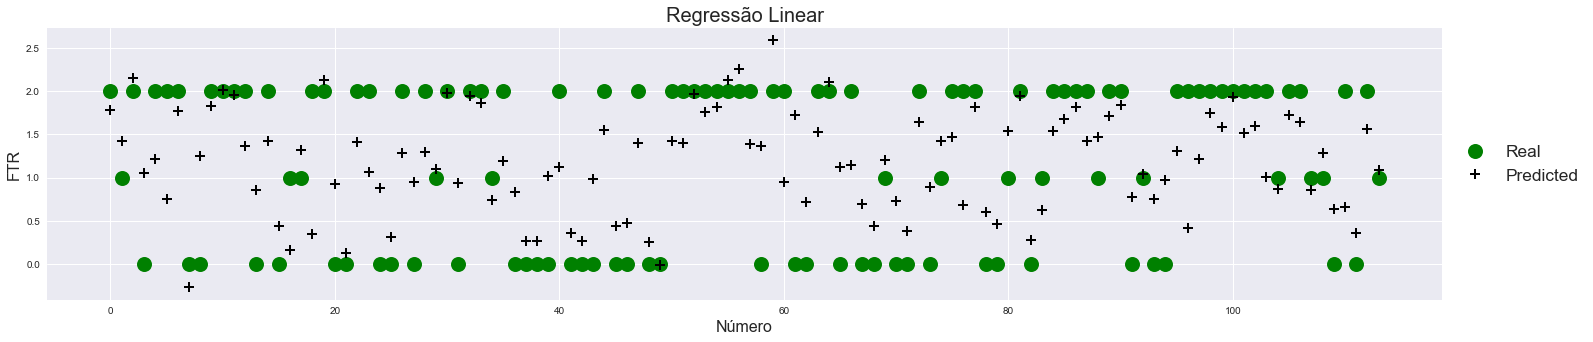

In [304]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_linear_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Linear',fontsize=20)
plt.show()

In [305]:
print('Score Regressão Linear: %.2f' %linear_regression.score(X_test, y_test))

Score Regressão Linear: 0.49


### Regressão Logística

In [306]:
from sklearn.linear_model import LogisticRegression

In [307]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [308]:
print(classification_report(y_test,predict_logistic_regression))
print(confusion_matrix(y_test,predict_logistic_regression))
print('\nScore Regressão Log: %.2f' %logistic_regression.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        39
           1       0.33      0.20      0.25        15
           2       0.79      0.90      0.84        60

    accuracy                           0.75       114
   macro avg       0.63      0.61      0.61       114
weighted avg       0.72      0.75      0.73       114

[[28  5  6]
 [ 4  3  8]
 [ 5  1 54]]

Score Regressão Log: 0.75


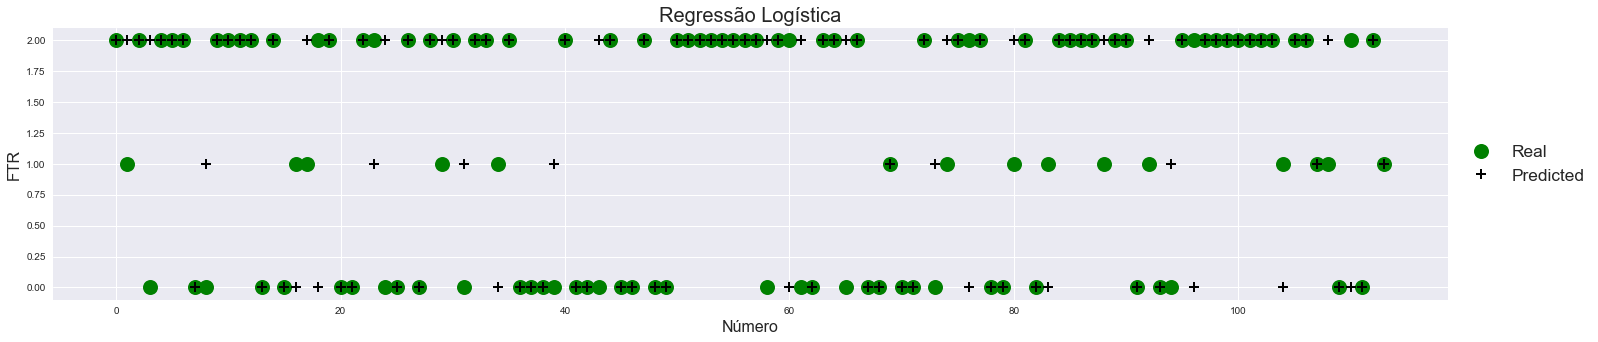

In [309]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_logistic_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Logística',fontsize=20)
plt.show()

### Árvore de Decisão

In [310]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)

In [312]:
print(classification_report(y_test,predict_decision_tree))
print(confusion_matrix(y_test,predict_decision_tree))
print('\nScore Árvore de Decisão: %.2f' %decision_tree.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        39
           1       0.07      0.13      0.09        15
           2       0.75      0.65      0.70        60

    accuracy                           0.55       114
   macro avg       0.49      0.45      0.46       114
weighted avg       0.63      0.55      0.58       114

[[22 11  6]
 [ 6  2  7]
 [ 6 15 39]]

Score Árvore de Decisão: 0.55


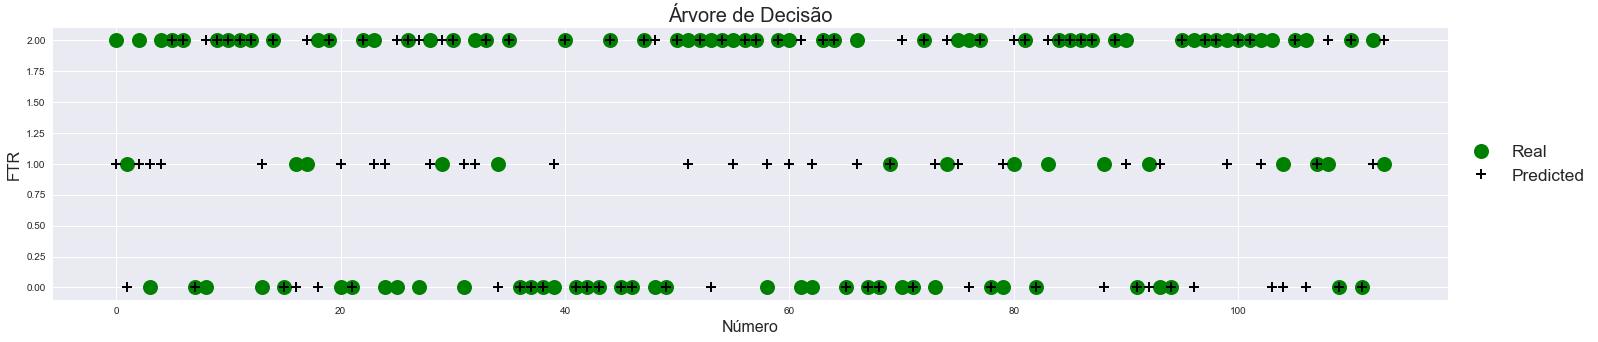

In [313]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_decision_tree, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Árvore de Decisão',fontsize=20)
plt.show()

### Floresta Aleatória

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
#Método do cotovelo
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Number estimativas')

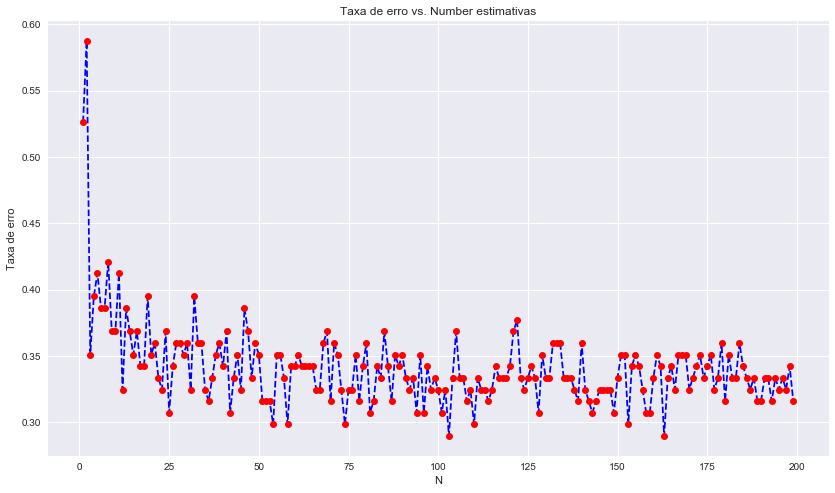

In [316]:
plt.figure(figsize=(14,8))
plt.plot(range(1,200),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Number estimativas")

In [317]:
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)

In [318]:
print(classification_report(y_test,predict_random_forest))
print(confusion_matrix(y_test,predict_random_forest))
print('\nScore Floresta Aleatória: %.2f' %random_forest.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        39
           1       0.00      0.00      0.00        15
           2       0.76      0.83      0.79        60

    accuracy                           0.68       114
   macro avg       0.47      0.52      0.50       114
weighted avg       0.63      0.68      0.65       114

[[28  4  7]
 [ 6  0  9]
 [ 8  2 50]]

Score Floresta Aleatória: 0.68


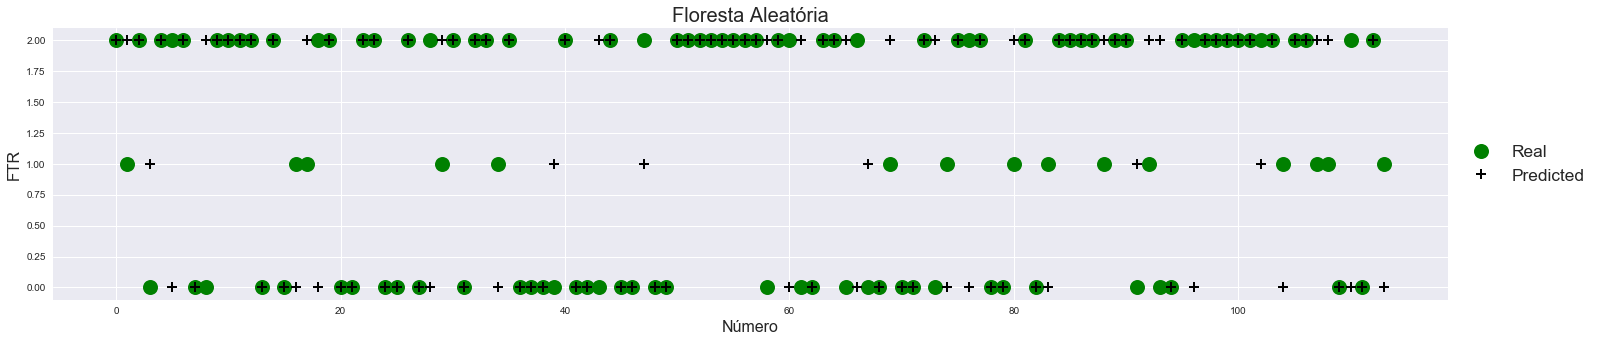

In [319]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_random_forest, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Floresta Aleatória',fontsize=20)
plt.show()

### K Nearest Neighbours (KNN)

In [320]:
from sklearn.neighbors import KNeighborsClassifier

In [321]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Number estimativas')

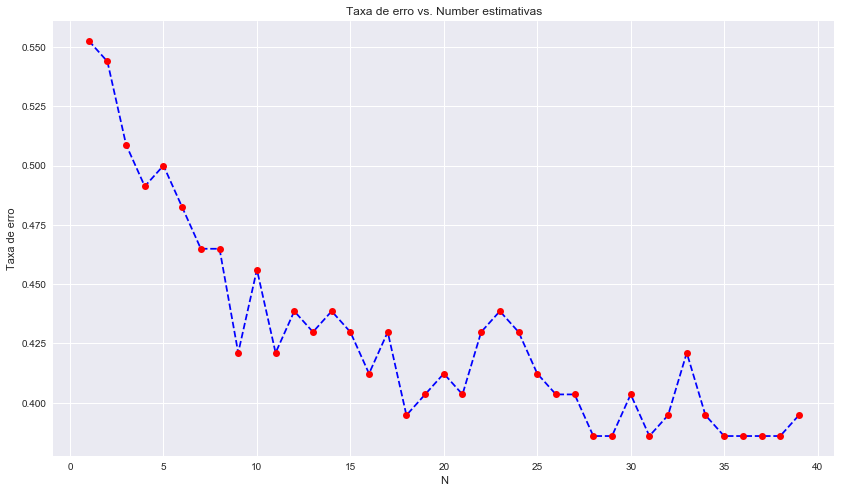

In [322]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Number estimativas")

In [323]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

In [324]:
print(classification_report(y_test,predict_knn))
print(confusion_matrix(y_test,predict_knn))
print('\nScore KNN: %.2f' %knn.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        39
           1       0.17      0.13      0.15        15
           2       0.67      0.72      0.69        60

    accuracy                           0.60       114
   macro avg       0.48      0.48      0.48       114
weighted avg       0.58      0.60      0.59       114

[[23  4 12]
 [ 4  2  9]
 [11  6 43]]

Score KNN: 0.60


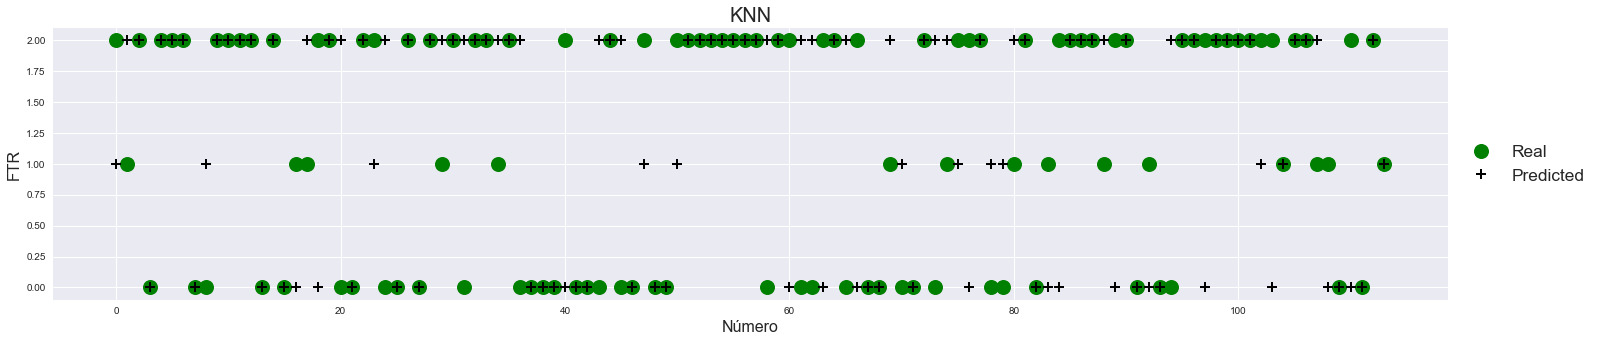

In [325]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_knn, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('KNN',fontsize=20)
plt.show()

### Support-vector Machine (SVM)

In [326]:
from sklearn.svm import SVC

In [327]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
predict_svm = grid.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.456, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.449, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.460, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.456, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.449, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.460, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [328]:
print(classification_report(y_test,predict_svm))
print(confusion_matrix(y_test,predict_svm))
print('\nScore SVM: %.2f' %grid.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.20      0.27      0.23        15
           2       0.81      0.77      0.79        60

    accuracy                           0.67       114
   macro avg       0.57      0.57      0.57       114
weighted avg       0.69      0.67      0.68       114

[[26  8  5]
 [ 5  4  6]
 [ 6  8 46]]

Score SVM: 0.67


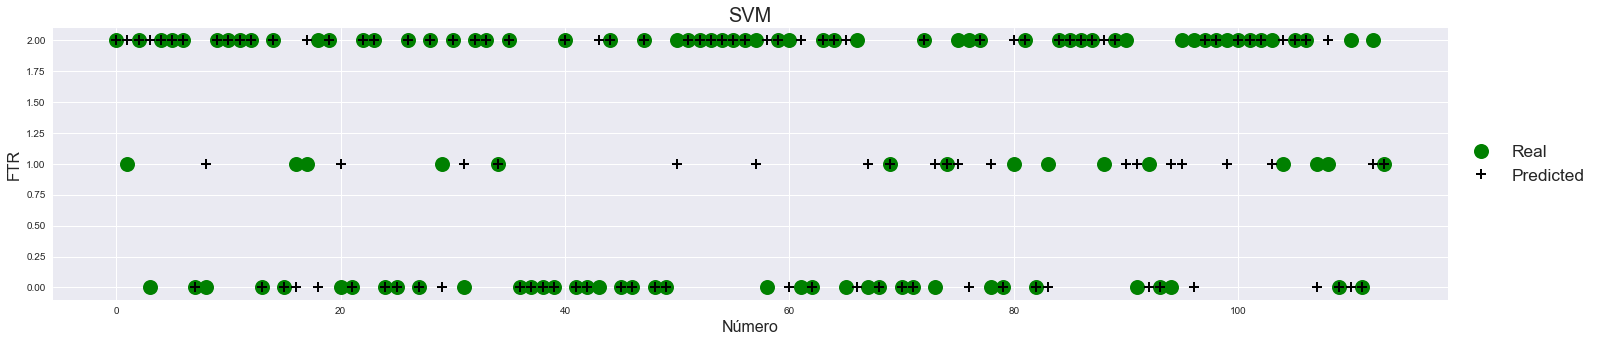

In [329]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_svm, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('SVM',fontsize=20)
plt.show()

## Resultados finais

In [330]:
print('Regressão linear: %.2f' %(linear_regression.score(X_test, y_test)*100) + "%") 
print('\nRegressão logística: %.2f' %(logistic_regression.score(X_test, y_test)*100) + "%")
print('\nÁrvore de decisão: %.2f' %(decision_tree.score(X_test, y_test)*100) + "%")
print('\nFloresta aleatória: %.2f' %(random_forest.score(X_test, y_test)*100) + "%")
print('\nKNN: %.2f' %(knn.score(X_test, y_test)*100) + "%")
print('\nSVM: %.2f' %(grid.score(X_test, y_test)*100) + "%")

Regressão linear: 48.57%

Regressão logística: 74.56%

Árvore de decisão: 55.26%

Floresta aleatória: 68.42%

KNN: 59.65%

SVM: 66.67%
